# Dynamical Friction

Figure 9.3 from Chapter 9 of Ryden, *Celestial and Stellar Dynamics*, Cambridge University Press.

Plot of the dependence of the dynamical friction deceleration from
\begin{equation}
\frac{dv_M}{dt} = -\frac{4\pi G^2 \rho_\star M \ln\Lambda}{\sigma^2} G_\mathrm{df} (X) .
\end{equation}
where
\begin{equation}
G_\mathrm{df} (X) = \frac{1}{2 X^2} \left[\mathrm{erf} (X) - \frac{2}{\sqrt\pi} X e^{-X^2} \right] 
\end{equation}
where $\mathrm{erf} (X)$ is the error function and $X$ is the dimensionless speed
\begin{equation}
X \equiv v_M / ( \sqrt{2} \sigma )
\end{equation}
Deceleration is normalized to its maximum value, which occurs at $X = 1$.

In [4]:
%matplotlib inline

import math
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, LogLocator, NullFormatter

# erf() from scipy

from scipy import special

# suppress nuisance warnings

import warnings
warnings.filterwarnings('ignore',category=UserWarning, append=True)
warnings.filterwarnings('ignore',category=RuntimeWarning, append=True)

## Standard Plot Format

Setup the standard plotting format and make the plot.  

In [5]:
plotFile = 'Fig9_3.png' 

# graphic aspect ratio = width/height

aspect = 4.0/3.0 # 4:3

#
# Don't change these unless you really need to (we never have)
#
# fPage is the horizontal fraction of the page occupied by the figure, default 1.0
#
# scaleFac is the LaTeX includegraphics scaling in units of \textwidth, default 1.0
#

fPage = 1.0
scaleFac = 0.85

# Text width in inches - don't change, this is defined by the print layout

textWidth = 6.0 # inches

figFmt = 'png'
dpi = 600
plotWidth = dpi*fPage*textWidth
plotHeight = plotWidth/aspect
axisFontSize = 12
labelFontSize = 10
lwidth = 0.5
axisPad = 5
wInches = fPage*textWidth # float(plotWidth)/float(dpi)
hInches = wInches/aspect  # float(plotHeight)/float(dpi)

# LaTeX is used throughout for markup of symbols, Times-Roman serif font

plt.rc('text', usetex=True)
plt.rc('font', **{'family':'serif','serif':['Times-Roman'],'weight':'bold','size':'16'})

# Font and line weight defaults for axes

matplotlib.rc('axes',linewidth=lwidth)
matplotlib.rcParams.update({'font.size':axisFontSize})

# axis and label padding

plt.rcParams['xtick.major.pad']=f'{axisPad}'
plt.rcParams['ytick.major.pad']=f'{axisPad}'
plt.rcParams['axes.labelpad'] = f'{axisPad}'

## Dynamical friction

Compute $G_\mathrm{df}(X)$:
\begin{equation}
G_\mathrm{df} (X) = \frac{1}{2 X^2} \left[\mathrm{erf} (X) - \frac{2}{\sqrt\pi} X e^{-X^2} \right] 
\end{equation}
for X=0.01 to 100 in even logarithmic intervals

In [6]:
xMin = 0.01
xMax = 100

logX = np.linspace(np.log10(xMin),np.log10(xMax),101)

X = 10.0**logX
Gdf = (1.0/(2.0*X**2))*(special.erf(X) - ((2.0/np.sqrt(np.pi))*X*np.exp(-X*X)))

# normalize to 1.0 at peak

maxG = np.max(Gdf)
Gdf *= (1.0/maxG)

# Y limits

yMin = 2e-4
yMax = 2.0

### Figure 9.3

Log-log plot of $G_\mathrm{df}(X)$ vs $X$.
 

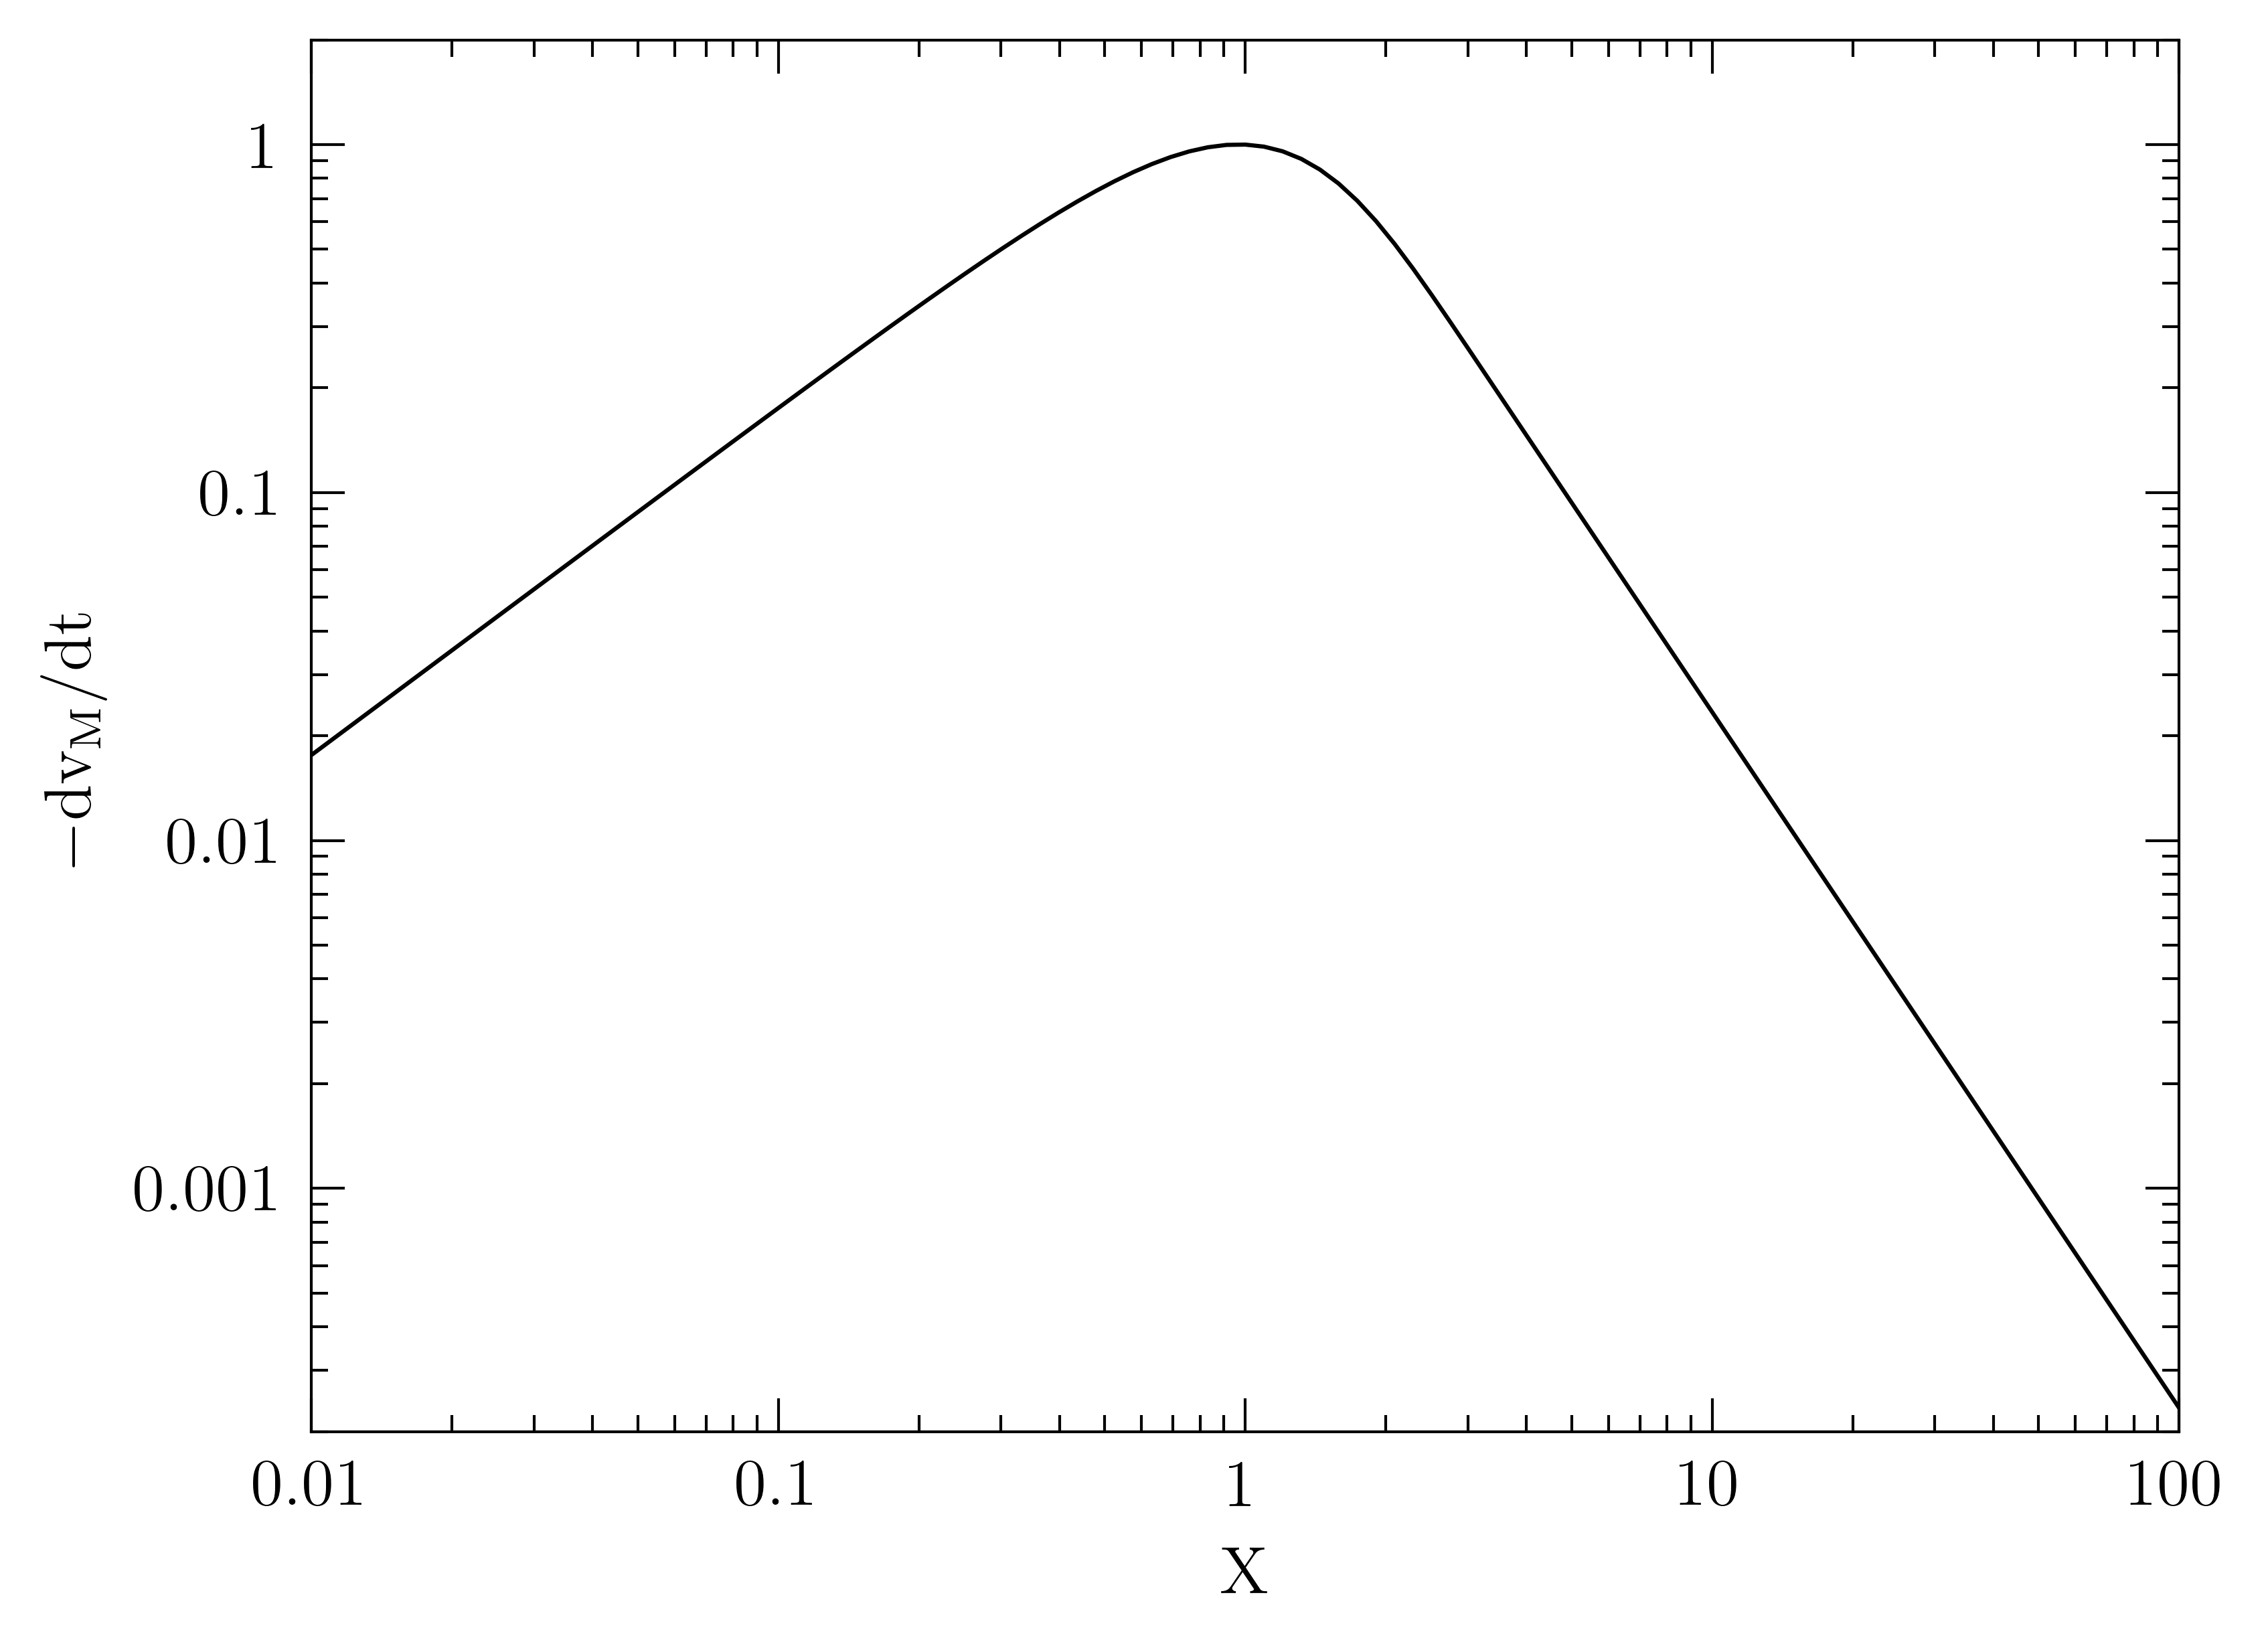

In [7]:
fig,ax = plt.subplots(figsize=(wInches,hInches),dpi=dpi)

ax.tick_params('both',length=6,width=lwidth,which='major',direction='in',top='on',right='on')
ax.tick_params('both',length=3,width=lwidth,which='minor',direction='in',top='on',right='on')

# Limits

ax.set_xlim(xMin,xMax)
ax.set_xscale('log')
ax.xaxis.set_major_locator(LogLocator(base=10.0,subs=(1.0,),numticks=100))
ax.xaxis.set_minor_locator(LogLocator(base=10.0,subs=np.arange(2,10)*0.1,numticks=100))
ax.xaxis.set_minor_formatter(NullFormatter())
ax.set_xticks([0.01,0.1,1,10,100])
ax.set_xticklabels(['0.01','0.1','1','10','100'])
ax.set_xlabel(r'X',fontsize=axisFontSize)

ax.set_ylim(yMin,yMax)
ax.set_yscale('log')
ax.yaxis.set_major_locator(LogLocator(base=10.0,subs=(1.0,),numticks=100))
ax.yaxis.set_minor_locator(LogLocator(base=10.0,subs=np.arange(2,10)*0.1,numticks=100))
ax.yaxis.set_minor_formatter(NullFormatter())
ax.set_yticks([0.001,0.01,0.1,1])
ax.set_yticklabels(['0.001','0.01','0.1','1'])
ax.set_ylabel(r'$-$dv$_{\rm M}$/dt',fontsize=axisFontSize)

ax.plot(X,Gdf,ls='-',lw=0.75,color='black',zorder=10)

plt.plot()
plt.savefig(plotFile,bbox_inches='tight',facecolor='white')